In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 24

@author: yaning
"""

import numpy as np
import importlib
import matplotlib.pyplot as plt
import torch
from torch.distributions import Normal, Uniform
from tqdm import tqdm

# functions and classes that i wrote
import NN_run.run_network as run_network
import NN.Receptors as Receptors
import NN.Network as Network

importlib.reload(run_network)
importlib.reload(Receptors)
importlib.reload(Network)

np.set_printoptions(threshold=np.inf)

In [644]:
# get the minimum and maximum of the voltages
def get_min_max_distance(voltages):
    min_voltage = abs(np.nanmin(voltages) + 70)
    max_voltage = abs(np.nanmax(voltages) - 40.1)
    return min_voltage, max_voltage

In [14]:
# original infer_params and names
infer_names = Receptors.LigandGatedChannelFactory.infer_names
infer_params = Receptors.LigandGatedChannelFactory.infer_params

In [646]:
infer_params

{'gMax_AMPA': 0.0072,
 'gMax_NMDA': 0.0144,
 'gMax_GABA': 0.04,
 'w_init_AMPA': 11.281441608630427,
 'w_init_NMDA': 10.085930406900129,
 'w_init_GABA': 11.450332843834373,
 'e_init': 0.8,
 'g_decay_init': 1,
 'g_rise_init': 1,
 'tau_pre': 20,
 'tau_post': 10,
 'tau_rec': 1,
 'u_se': 1,
 'tau_decay_AMPA': 35,
 'tau_rise_AMPA': 7,
 'tau_decay_NMDA': 15,
 'tau_rise_NMDA': 7,
 'tau_decay_GABA': 20,
 'tau_rise_GABA': 7}

In [647]:
# run first round
voltages, firing, error_code, neurons = run_network.run(infer_params)

/home/yaning/Documents/Spiking_NN/NN/Receptors.py:79: RuntimeWarning: overflow encountered in exp
  self.m.alpha = .1*((25-self.Vm) / (np.exp((25-self.Vm)/10)-1))
/home/yaning/Documents/Spiking_NN/NN/Receptors.py:80: RuntimeWarning: overflow encountered in exp
  self.m.beta = 4*np.exp(-self.Vm/18)
/home/yaning/Documents/Spiking_NN/NN/Receptors.py:81: RuntimeWarning: overflow encountered in exp
  self.n.alpha = .01 * ((10-self.Vm) / (np.exp((10-self.Vm)/10)-1))
/home/yaning/Documents/Spiking_NN/NN/Receptors.py:82: RuntimeWarning: overflow encountered in exp
  self.n.beta = .125*np.exp(-self.Vm/80)
/home/yaning/Documents/Spiking_NN/NN/Receptors.py:83: RuntimeWarning: overflow encountered in exp
  self.h.alpha = .07*np.exp(-self.Vm/20)
/home/yaning/Documents/Spiking_NN/NN/Receptors.py:84: RuntimeWarning: overflow encountered in exp
  self.h.beta = 1/(np.exp((30-self.Vm)/10)+1)
/home/yaning/Documents/Spiking_NN/NN/Network.py:88: RuntimeWarning: invalid value encountered in scalar add
  sel

In [648]:
min_voltage_old, max_voltage_old = get_min_max_distance(voltages)

In [649]:
# # initial params
# w_init_AMPA_mean = infer_params["w_init_AMPA_mean"]
# w_init_NMDA_mean = infer_params["w_init_AMPA_mean"]
# w_init_GABA_mean = 11.891703334259077



In [ ]:
samples = []
for _ in tqdm(range(50), desc="Processing", ncols=100):
    # sampling
    gMax_AMPA_new_sample = Normal(infer_params["gMax_AMPA"], 1).sample()
    gMax_NMDA_new_sample = Normal(infer_params["gMax_NMDA"], 1).sample()
    gMax_GABA_new_sample = Normal(infer_params["gMax_GABA"], 1).sample()
    w_init_AMPA_mean_new_sample = Normal(infer_params["w_init_AMPA"], 20).sample()
    w_init_NMDA_mean_new_sample = Normal(infer_params["w_init_NMDA"], 20).sample()
    w_init_GABA_mean_new_sample = Normal(infer_params["w_init_GABA"], 20).sample()
    
    e_init_new_sample = Normal(infer_params["e_init"], 0.01).sample() # 0.8
    g_decay_init_new_sample = Normal(infer_params["g_decay_init"], 1).sample() # 1
    g_rise_init_new_sample = Normal(infer_params["g_rise_init"], 1).sample() # 1
    tau_pre_new_sample = Normal(infer_params["tau_pre"], 5).sample() # 20
    tau_post_new_sample = Normal(infer_params["tau_post"], 5).sample() # 10
    tau_rec_new_sample = Normal(infer_params["tau_rec"], 2).sample() # 1
    u_se_new_sample = Normal(infer_params["u_se"], 2).sample() # 1
    
    tau_decay_AMPA_new_sample = Normal(infer_params["tau_decay_AMPA"], 5).sample() # 35
    tau_rise_AMPA_new_sample = Normal(infer_params["tau_rise_AMPA"], 5).sample() # 7
    tau_decay_NMDA_new_sample = Normal(infer_params["tau_decay_NMDA"], 5).sample() # 15
    tau_rise_NMDA_new_sample = Normal(infer_params["tau_rise_NMDA"], 5).sample() # 7
    tau_decay_GABA_new_sample = Normal(infer_params["tau_decay_GABA"], 5).sample() # 20
    tau_rise_GABA_new_sample = Normal(infer_params["tau_rise_GABA"], 5).sample() # 7
    
    
    temp_infer_params = infer_params
    
    temp_infer_params["gMax_AMPA"] = gMax_AMPA_new_sample
    temp_infer_params["gMax_NMDA"] = gMax_NMDA_new_sample
    temp_infer_params["gMax_GABA"] = gMax_GABA_new_sample
    temp_infer_params["w_init_AMPA"] = w_init_AMPA_mean_new_sample
    temp_infer_params["w_init_NMDA"] = w_init_NMDA_mean_new_sample
    temp_infer_params["w_init_GABA"] = w_init_GABA_mean_new_sample
    
    temp_infer_params["e_init"] = e_init_new_sample
    temp_infer_params["g_decay_init"] = g_decay_init_new_sample
    temp_infer_params["g_rise_init"] = g_rise_init_new_sample
    temp_infer_params["tau_pre"] = tau_pre_new_sample
    temp_infer_params["tau_post"] = tau_post_new_sample
    temp_infer_params["tau_rec"] = tau_rec_new_sample
    temp_infer_params["u_se"] = u_se_new_sample    
    temp_infer_params["tau_decay_AMPA"] = tau_decay_AMPA_new_sample
    temp_infer_params["tau_rise_AMPA"] = tau_rise_AMPA_new_sample
    temp_infer_params["tau_decay_NMDA"] =  tau_decay_NMDA_new_sample
    temp_infer_params["tau_rise_NMDA"] =  tau_rise_NMDA_new_sample
    temp_infer_params["tau_decay_GABA"] =  tau_decay_GABA_new_sample
    temp_infer_params["tau_rise_GABA"] =  tau_rise_GABA_new_sample
    

    # run with sampled value
    voltages, firing, error_code, neurons = run_network.run(temp_infer_params)
    
    min_voltage_new, max_voltage_new = get_min_max_distance(voltages)
    
    # get the rates 
    min_voltage_rate = min_voltage_new/min_voltage_old
    max_voltage_rate = max_voltage_new/max_voltage_old
    
    # print(min_voltage_new, min_voltage_old, max_voltage_new, max_voltage_old)
    
    combine_evaluation = min_voltage_rate*max_voltage_rate
    # print(combine_evaluation)
    if combine_evaluation >= 1 or combine_evaluation > Uniform(0,1).sample():
        
        min_voltage_old = min_voltage_new
        max_voltage_old = max_voltage_new
        
        infer_params = temp_infer_params
        print("this line runs")
    
    one_round_sample = []
    for name in infer_names:
        one_round_sample.append(infer_params[name])
    
    samples.append(one_round_sample)
    


In [651]:
# with warnings.catch_warnings(record=True) as caught_warnings:
#     warnings.simplefilter("always")  # Capture all warnings
#     voltages, firing, error_code, neurons = run_network.run(infer_params)
#     runtime_warnings = [w for w in caught_warnings if issubclass(w.category, RuntimeWarning)]
#     print(f"Number of RuntimeWarnings: {len(runtime_warnings)}")

In [652]:
samples

[[tensor(1.1860),
  tensor(-1.0021),
  tensor(-0.2860),
  tensor(0.2668),
  tensor(43.7239),
  tensor(-3.2075),
  tensor(0.7908),
  tensor(1.5107),
  tensor(0.7401),
  tensor(25.4739),
  tensor(3.2110),
  tensor(4.0839),
  tensor(1.5625),
  tensor(41.5517),
  tensor(1.4482),
  tensor(12.4733),
  tensor(9.2707),
  tensor(16.6872),
  tensor(9.7063)],
 [tensor(0.9192),
  tensor(-0.2867),
  tensor(-0.6755),
  tensor(19.5187),
  tensor(35.5744),
  tensor(8.7520),
  tensor(0.7756),
  tensor(1.9600),
  tensor(-0.1563),
  tensor(24.2893),
  tensor(1.7579),
  tensor(3.0724),
  tensor(2.1377),
  tensor(41.3917),
  tensor(-0.4255),
  tensor(10.2897),
  tensor(9.1739),
  tensor(18.5725),
  tensor(8.8698)],
 [tensor(-1.2123),
  tensor(0.4785),
  tensor(-1.5342),
  tensor(32.5752),
  tensor(13.9714),
  tensor(28.6021),
  tensor(0.7913),
  tensor(1.3066),
  tensor(-1.0417),
  tensor(28.9661),
  tensor(-0.5858),
  tensor(3.8250),
  tensor(1.2179),
  tensor(44.1909),
  tensor(-6.8088),
  tensor(13.6661

In [2]:
samples_array = np.array(samples)

NameError: name 'samples' is not defined

In [654]:
samples_array.shape

(50, 19)

In [655]:
samples_array

array([[ 1.18597627e+00, -1.00209534e+00, -2.86001831e-01,
         2.66791344e-01,  4.37238617e+01, -3.20748043e+00,
         7.90809453e-01,  1.51072121e+00,  7.40114152e-01,
         2.54739323e+01,  3.21102190e+00,  4.08390188e+00,
         1.56245470e+00,  4.15516586e+01,  1.44823456e+00,
         1.24732828e+01,  9.27072430e+00,  1.66872215e+01,
         9.70631790e+00],
       [ 9.19187069e-01, -2.86699176e-01, -6.75511837e-01,
         1.95186996e+01,  3.55744286e+01,  8.75204468e+00,
         7.75605381e-01,  1.95996809e+00, -1.56261623e-01,
         2.42892570e+01,  1.75793433e+00,  3.07240963e+00,
         2.13773823e+00,  4.13916779e+01, -4.25515056e-01,
         1.02896595e+01,  9.17393017e+00,  1.85725193e+01,
         8.86976242e+00],
       [-1.21229243e+00,  4.78541911e-01, -1.53417361e+00,
         3.25752449e+01,  1.39714451e+01,  2.86020851e+01,
         7.91294873e-01,  1.30664253e+00, -1.04168987e+00,
         2.89660606e+01, -5.85815191e-01,  3.82503200e+00,
    

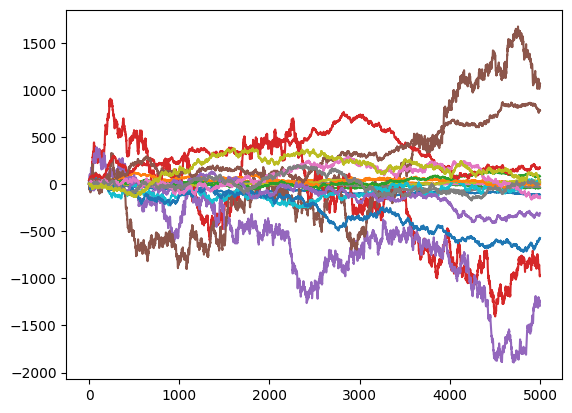

In [3]:
plt.plot(samples)

In [47]:
voltages = np.array(voltages)
firing = np.array(firing)
error_code = np.array(error_code)

In [658]:
np.sum(error_code)

3

In [75]:
samples = np.load('samples_fixed.npy')
samples_pure = np.load('samples_fixed_pure.npy')

In [25]:
samples

array([[6.51390135e-01, 2.69927412e-01, 1.42022148e-01, 9.99954462e-01,
        1.00000000e+00, 9.61348534e-01, 6.91681921e-01, 5.00487268e-01,
        9.14044499e-01, 1.00000000e+01, 9.99998951e+00, 7.09590435e+00,
        8.58207345e-01, 1.00000000e+01, 9.99728966e+00, 9.99999619e+00,
        9.99755001e+00, 1.00000000e+01, 9.44247341e+00],
       [4.10320073e-01, 4.30409282e-01, 2.61983186e-01, 5.86136885e-04,
        1.00000000e+00, 1.16091011e-15, 6.63552046e-01, 7.01536119e-01,
        4.98870194e-01, 9.99999428e+00, 9.99995708e+00, 9.99260616e+00,
        3.97845596e-01, 9.99999619e+00, 9.98342323e+00, 9.99996090e+00,
        9.99999046e+00, 9.99182796e+00, 9.99993706e+00],
       [3.19760203e-01, 6.49869740e-01, 7.49654174e-01, 1.25220576e-02,
        3.80578012e-06, 1.56230517e-02, 6.60749435e-01, 6.28758013e-01,
        5.40128708e-01, 9.97040176e+00, 1.00000000e+01, 9.99994373e+00,
        1.32816523e-01, 6.38496590e+00, 9.99999905e+00, 9.99998665e+00,
        9.92473793e+00

In [79]:
distributions = samples[500:]

In [80]:
reshape_distri = distributions.T

In [7]:
reshape_distri.shape

(19, 3000)

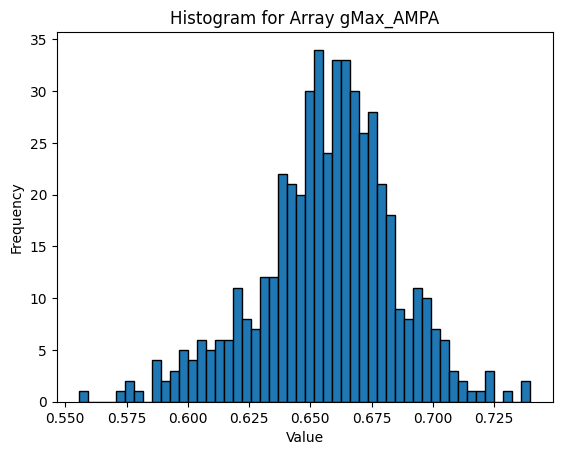

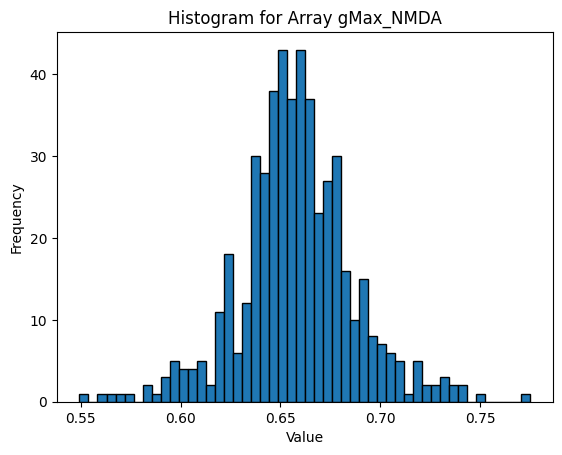

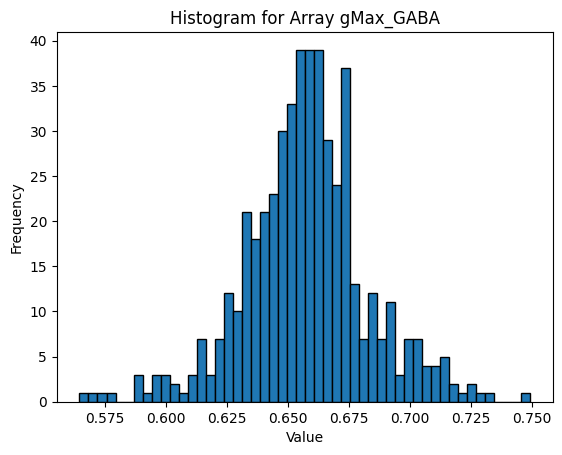

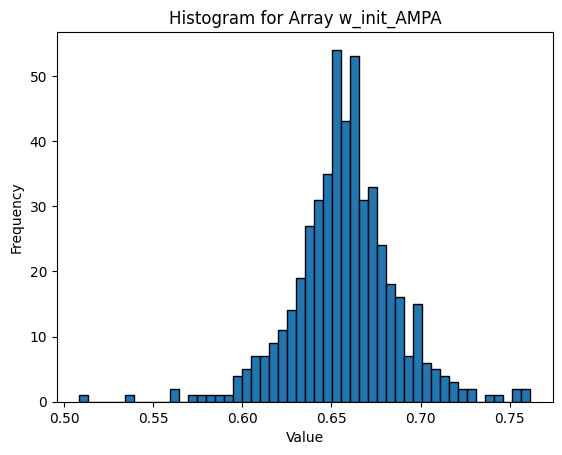

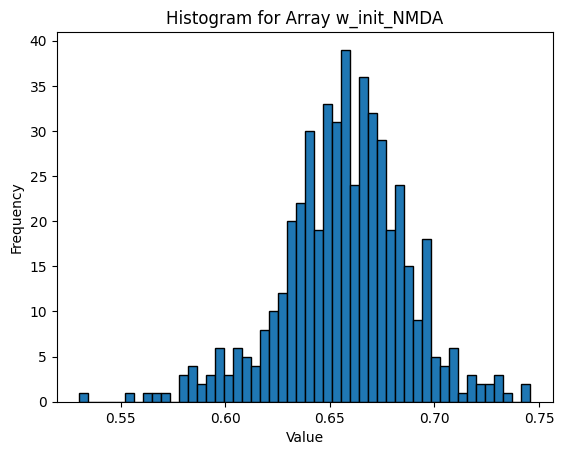

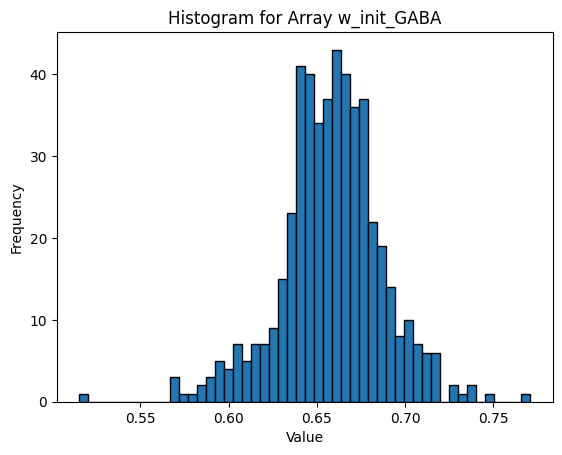

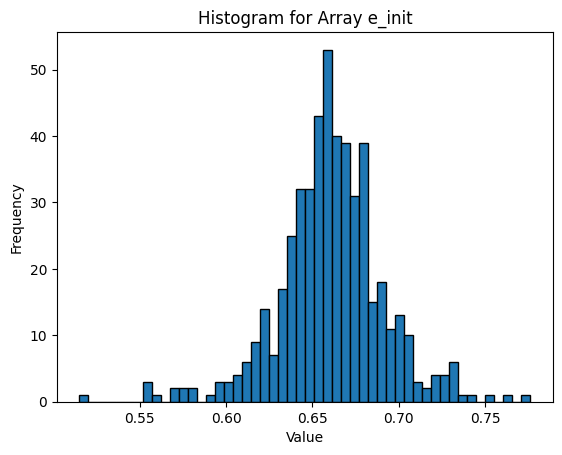

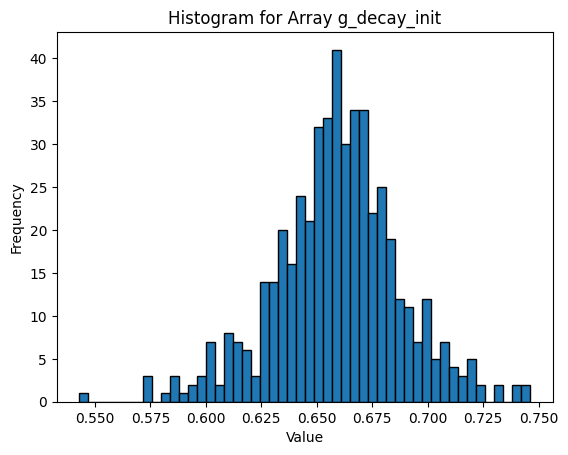

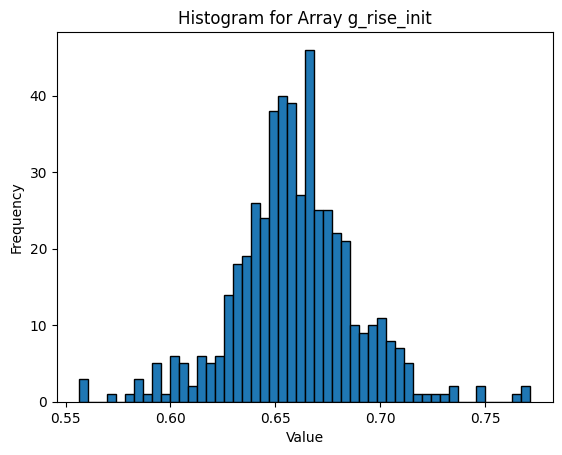

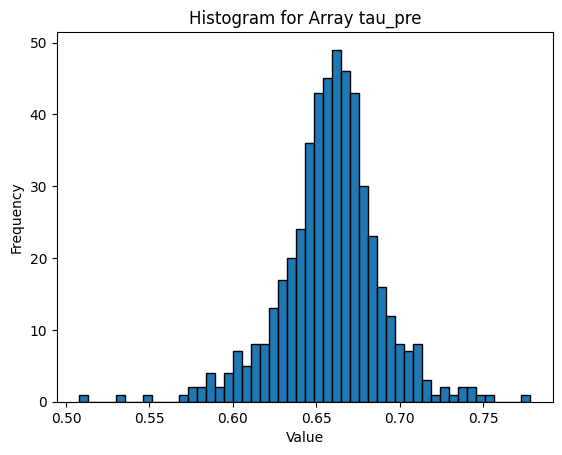

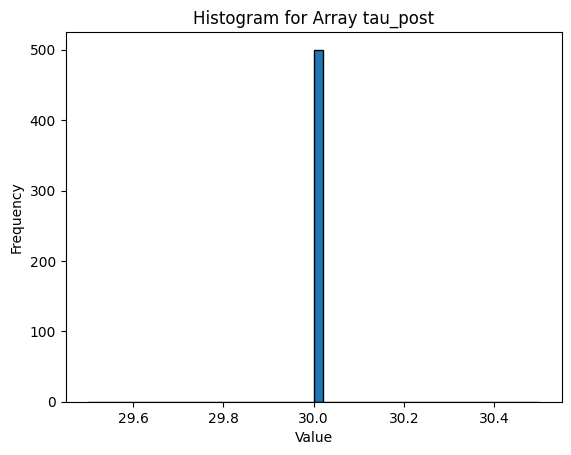

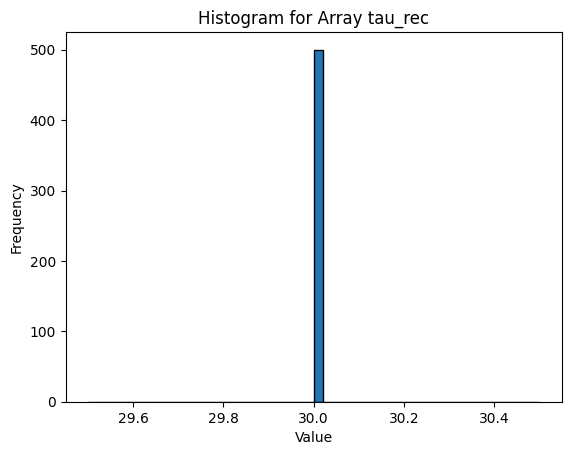

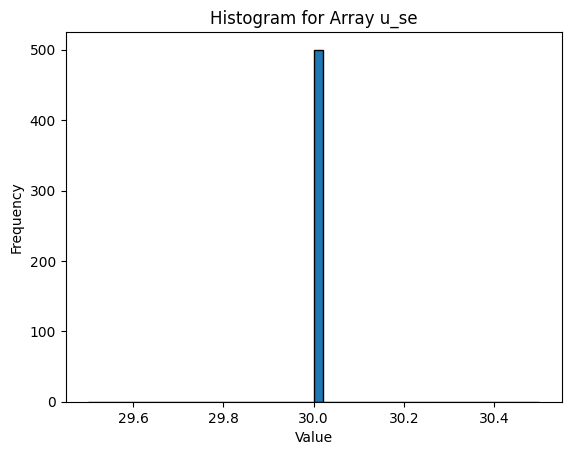

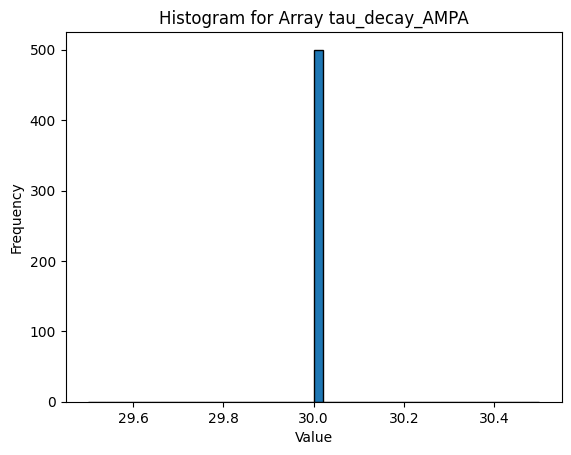

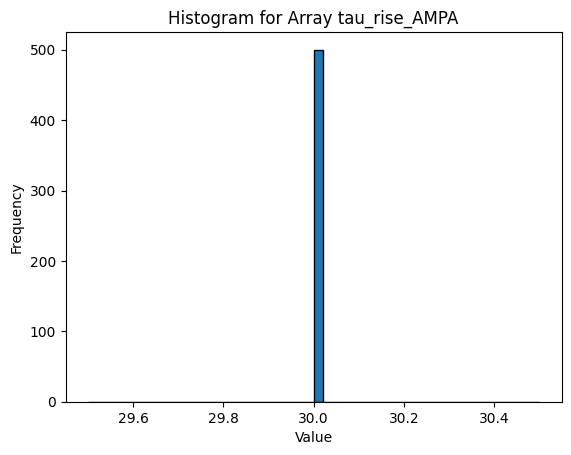

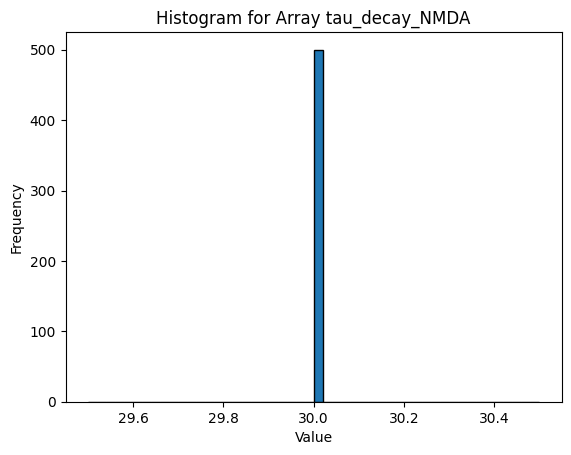

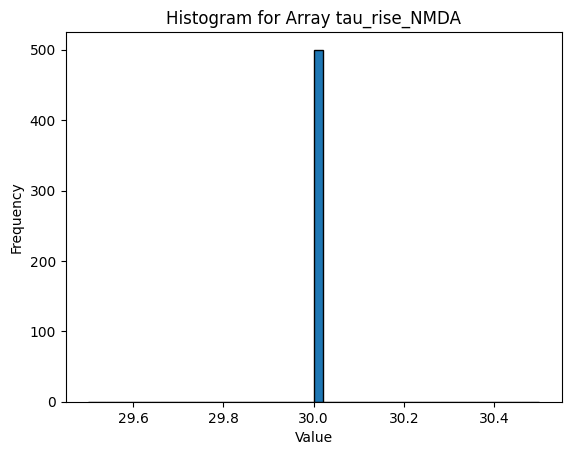

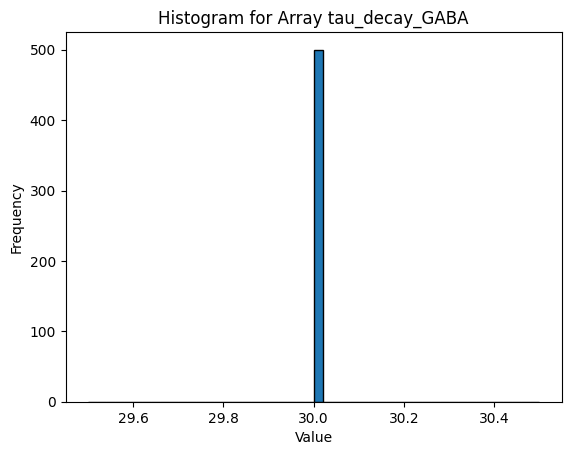

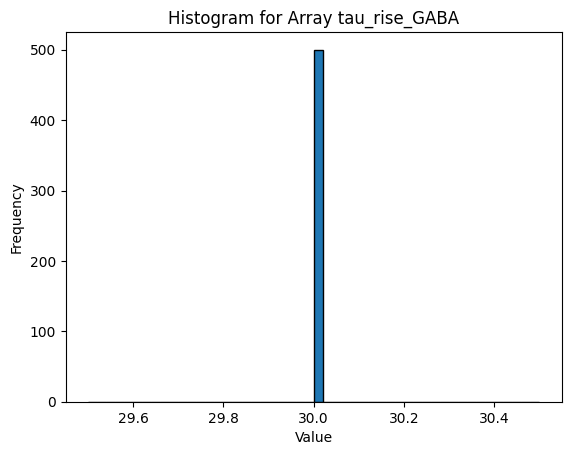

In [81]:
for i, data in enumerate(reshape_distri):
    plt.figure()  # Create a new figure for each plot
    plt.hist(data, bins=50, edgecolor='black')
    plt.title(f'Histogram for Array {infer_names[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [15]:
distributions.shape

(3000, 19)

In [70]:
last = samples[-1]

In [71]:
infer_params["gMax_AMPA"] = last[0]
infer_params["gMax_NMDA"] = last[1]
infer_params["gMax_GABA"] = last[2]
infer_params["w_init_AMPA"] = last[3]
infer_params["w_init_NMDA"] = last[4]
infer_params["w_init_GABA"] = last[5]

infer_params["e_init"] = last[6]
infer_params["g_decay_init"] = last[7]
infer_params["g_rise_init"] = last[8]
infer_params["tau_pre"] = last[9]
infer_params["tau_post"] = last[10]
infer_params["tau_rec"] = last[11]
infer_params["u_se"] = last[12]  
infer_params["tau_decay_AMPA"] = last[13]
infer_params["tau_rise_AMPA"] = last[14]
infer_params["tau_decay_NMDA"] =  last[15]
infer_params["tau_rise_NMDA"] =  last[16]
infer_params["tau_decay_GABA"] = last[17]
infer_params["tau_rise_GABA"] =  last[18]

In [72]:
voltages, firing, error_code, neurons = run_network.run(infer_params)

In [73]:
voltages = np.array(voltages)
firing = np.array(firing)
error_code = np.array(error_code)

In [659]:
np.where(error_code != 0)

(array([2267, 2268, 2269]), array([4, 4, 4]))

In [660]:
error_code[2042]

array([0, 0, 0, 0, 0, 0])

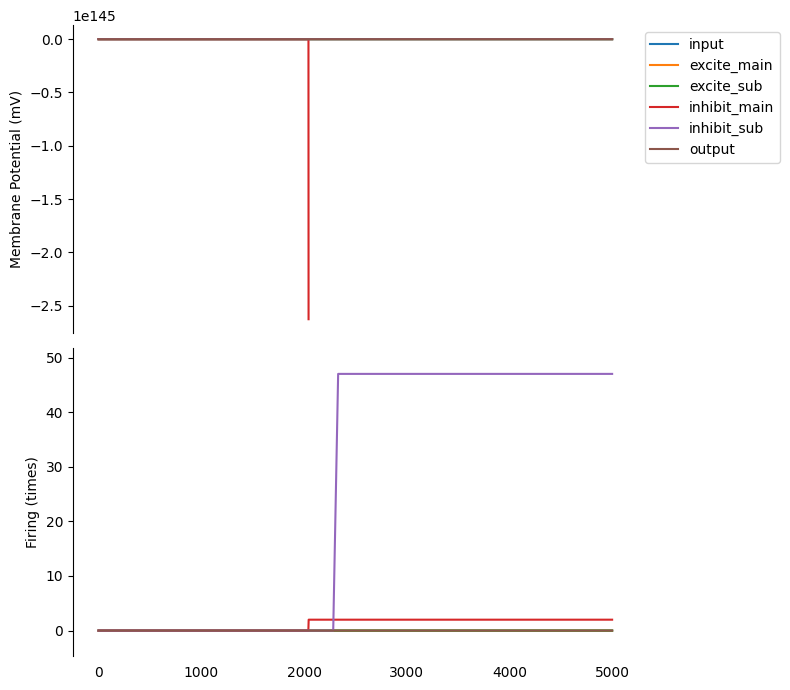

In [74]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 7),
                                gridspec_kw={'height_ratios': [1, 1]})


# ax1.set_title("Hodgkin-Huxley Spiking Neuron Model", fontSize=16)

# voltage plot
for i in range(len(neurons)):
    ax1.plot(np.arange(5000), voltages[:,i], label=neurons[i])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)
ax1.set_ylabel("Membrane Potential (mV)")
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))

# firing plot
for i in range(len(neurons)):
    ax2.plot(np.arange(5000), firing[:,i], label=neurons[i])

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.tick_params(bottom=False)
ax2.set_ylabel("Firing (times)")


# ax2.plot(times, I_neuron1, label = '1')
# ax2.plot(times, I_neuron2, label = '2')
# ax2.set_ylabel("Currents (µA/cm²)")
# ax2.set_xlabel("Simulation Time (milliseconds)")
# ax2.spines['right'].set_visible(False)
# ax2.spines['top'].set_visible(False)


plt.margins(0, 0.1)
plt.tight_layout()
plt.show()

# sharp wave ripples

In [662]:
np.where(np.isnan(voltages))[0].shape

(2731,)

In [663]:
np.nanmin(voltages)

-8.78653512440385e+65